In [20]:
from erddaplogs.logparse import ErddapLogParser

# Instantiate parser and set verbosity

(False to disable print messages)

In [21]:
parser = ErddapLogParser()
parser.verbose=True

### set path to apache and/or nginx files

In [22]:
#apache_logs_dir = "path/to/your/apache/logs/"
nginx_logs_dir = "example_data/nginx_example_logs/"

### load log files

Can call just apache or just nginx as needed. File name allows for wildcard.

In [23]:
#parser.load_apache_logs(apache_logs_dir,"*access.log*")
parser.load_nginx_logs(nginx_logs_dir,"*tomcat-access*")


loaded 10479 log lines from example_data/nginx_example_logs/
DataFrame now has 10241 lines


**optional** subset datasetframe to desired number of rows, evenly spaced in time. Useful for tuning/testing

In [ ]:
#parser.subset_df(rows=1000) 

In [24]:
parser.filter_non_erddap()
parser.filter_spam()
parser.filter_locales()
parser.filter_user_agents()
parser.filter_common_strings()

Filter non erddap dropped 908 lines. Length of dataset is now 91 % of original
Filter spam dropped 118 lines. Length of dataset is now 89 % of original
Filter locales dropped 0 lines. Length of dataset is now 89 % of original
Filter user agents dropped 1041 lines. Length of dataset is now 79 % of original
Filter common strings dropped 742 lines. Length of dataset is now 72 % of original


# get info on ip addresses

In [25]:
parser.get_ip_info(download_new=True)
parser.filter_organisations()


We have info on 790 ip address
Filter organisations dropped 4 lines. Length of dataset is now 72 % of original


### Optional: read in datasets.xml

This adds another column of data: the dataset type in ERDDAP

In [26]:
parser.parse_datasets_xml("example_data/datasets.xml")

# Parse string data for additional columns

In [27]:
parser.parse_columns()

# Get requests dataframe

In [28]:
df = parser.df
df.head()

ip,datetime,url,user-agent,status-code,bytes-sent,referer,status,country,countryCode,region,regionName,city,zip,lat,lon,timezone,isp,org,as,message,base_url,erddap_request_type,dataset_id,request_kwargs,file_type,user_agent_base,ip_group,ip_subnet,dataset_type
str,datetime[μs],str,str,i64,i64,str,str,str,str,str,str,str,str,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""171.177.25.126…",2024-05-12 00:00:17,"""/erddap/tabled…","""python-request…",200,594982,"""""-""""","""success""","""United States""","""US""","""CA""","""California""","""Concord""","""94520""",37.974,-122.033,"""America/Los_An…","""Bank of Americ…","""Bank of Americ…","""""",null,"""/erddap/tabled…","""tabledap""","""allDatasets""","""None""","""csv""","""python-request…","""171.177""","""171.177.25""",null
"""237.85.78.47""",2024-05-12 00:08:38,"""/erddap/subscr…","""curl/7.54.0""",200,10797,"""""-""""","""fail""","""unknown""",null,null,null,null,null,0.0,0.0,null,"""unknown""","""unknown""",null,"""reserved range…","""/erddap/subscr…","""None""","""add""","""datasetID=nrt_…","""html""","""curl""","""237.85""","""237.85.78""",null
"""237.85.78.47""",2024-05-12 00:08:43,"""/erddap/subscr…","""curl/7.54.0""",200,10804,"""""-""""","""fail""","""unknown""",null,null,null,null,null,0.0,0.0,null,"""unknown""","""unknown""",null,"""reserved range…","""/erddap/subscr…","""None""","""add""","""datasetID=nrt_…","""html""","""curl""","""237.85""","""237.85.78""",null
"""237.85.78.47""",2024-05-12 00:08:43,"""/erddap/subscr…","""curl/7.54.0""",200,10804,"""""-""""","""fail""","""unknown""",null,null,null,null,null,0.0,0.0,null,"""unknown""","""unknown""",null,"""reserved range…","""/erddap/subscr…","""None""","""add""","""datasetID=nrt_…","""html""","""curl""","""237.85""","""237.85.78""",null
"""237.85.78.47""",2024-05-12 00:08:48,"""/erddap/subscr…","""curl/7.54.0""",200,10804,"""""-""""","""fail""","""unknown""",null,null,null,null,null,0.0,0.0,null,"""unknown""","""unknown""",null,"""reserved range…","""/erddap/subscr…","""None""","""add""","""datasetID=nrt_…","""html""","""curl""","""237.85""","""237.85.78""",null


You can also check out the ip dataframe

In [29]:
df_ip = parser.ip
df_ip.head()

status,country,countryCode,region,regionName,city,zip,lat,lon,timezone,isp,org,as,query,message
str,str,str,str,str,str,str,f64,f64,str,str,str,str,str,str
"""success""","""United States""","""US""","""CA""","""California""","""Redwood City""","""94065""",37.5307,-122.262,"""America/Los_An…","""Oracle Corpora…","""Oracle Corpora…","""""","""148.87.179.6""",null
"""success""","""United States""","""US""","""CA""","""California""","""Concord""","""94520""",37.974,-122.033,"""America/Los_An…","""Bank of Americ…","""Bank of Americ…","""""","""171.177.25.126…",null
"""success""","""South Korea""","""KR""","""44""","""Chungcheongnam…","""Asan""","""314""",36.894,126.8877,"""Asia/Seoul""","""LG DACOM Corpo…","""Boranet""","""AS3786 LG DACO…","""1.221.158.96""",null
"""success""","""France""","""FR""","""BRE""","""Brittany""","""Trémuson""","""22440""",48.5215,-2.8527,"""Europe/Paris""","""VERDUR""","""""","""AS2200 Renater…","""129.20.223.66""",null
"""success""","""United Kingdom…","""GB""","""ENG""","""England""","""Bromley""","""BR1""",51.4043,0.0146713,"""Europe/London""","""Selection Serv…","""Selection Serv…","""""","""78.40.63.239""",null


# Plotting the results

This additional functionality requires several extra packages



In [30]:
import erddaplogs.plot_functions as plot_functions

Plot requests summed over a user specified number of days

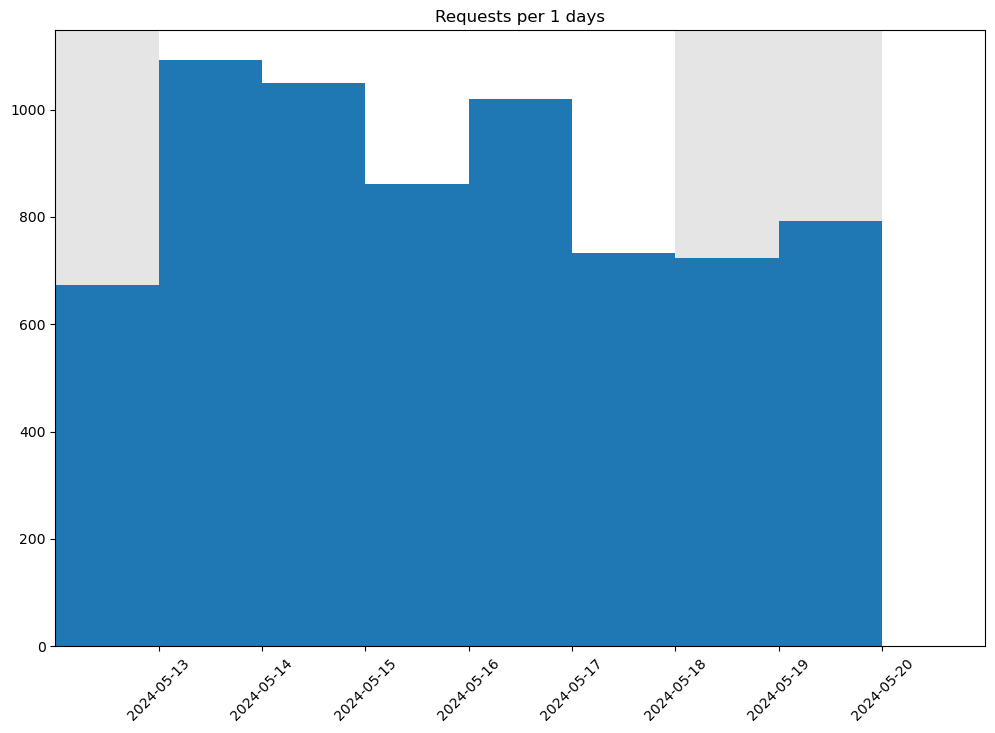

In [31]:
plot_functions.plot_daily_requests(df, num_days=1)

Plot the total size of requests summed over a number of days

In [ ]:
plot_functions.plot_bytes(df)

Plot the most popular values for chosen columns. This function returns a dataframe of the top results

In [ ]:
plot_functions.plot_most_popular(df, col_name='dataset_id');

The ERDDAP request type will be one of: griddap, tabledap, info, files, unknown

In [ ]:
plot_functions.plot_most_popular(df, col_name='erddap_request_type');

In [ ]:
plot_functions.plot_most_popular(df, col_name='user-agent', rows=20);

In [ ]:
plot_functions.plot_most_popular(df, col_name='user_agent_base', rows=5);

Create a map of the geolocations of the users that have made the most requests. We use the subnet (first 3 of dotted quad of the ipv4 address) to try to aggregate requests from e.g. a single building/insitution

In [ ]:
plot_functions.plot_map_requests(df, aggregate_on='ip_subnet');

Get a list of the ip adddresses that made the most requests and make some more in depth plots for them

In [ ]:
dfa = plot_functions.plot_most_popular(df, col_name='ip', rows=20)

In [ ]:
import polars as pl

for rank, ip in enumerate(dfa['ip'].to_list()):
    df_sub = df.filter(pl.col('ip')==ip)
    plot_functions.plot_for_single_ip(df_sub, f'visitor_rank_{rank}_ip_{ip}')

# Exporting Results

In order to export anonymized and aggregated results, simply call:

In [ ]:
parser.export_data()